# Data science project - Linear regression

# Exploring the dataset

## Import pandas library

https://pandas.pydata.org/

In [1]:
import pandas as pd

## Importing the CSV file

In [2]:
dados = pd.read_csv('dataset.csv', sep=';')

## Visualizing the dataset

In [3]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Check the dataset shape (lines and columns)

In [4]:
dados.shape

(5000, 4)

# Preliminary analysis

## Descriptive statistics

In [5]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


## Correlation matrix

In [6]:
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


## Import seaborn and matplotlib libraries

https://seaborn.pydata.org/

https://matplotlib.org/

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

## Graphics formatting settings

In [8]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

## Boxplot from dependent *variable* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

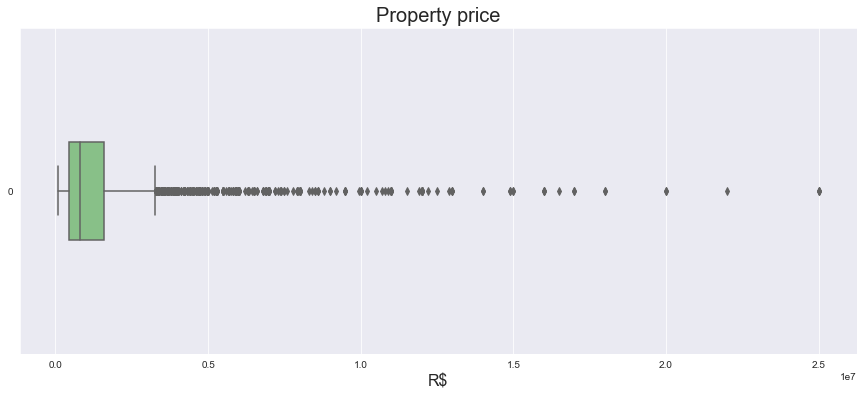

In [9]:
plt.figure(figsize = (15,6))
sns.boxplot(data=dados['Valor'], orient='h', width= 0.3)
plt.title('Property price', fontsize=20)
plt.xlabel('R$', fontsize=16)
plt.show()

## Frequency distribution of the dependent * variable * (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

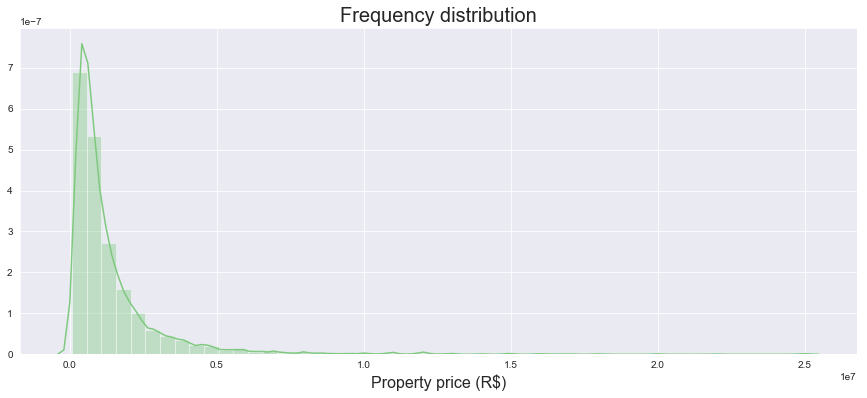

In [10]:
plt.figure(figsize = (15,6))
sns.distplot(dados['Valor'])
plt.title('Frequency distribution', fontsize=20)
plt.xlabel('Property price (R$)', fontsize=16)
plt.show()

## Scatterplot from dataset variables

## Seaborn pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

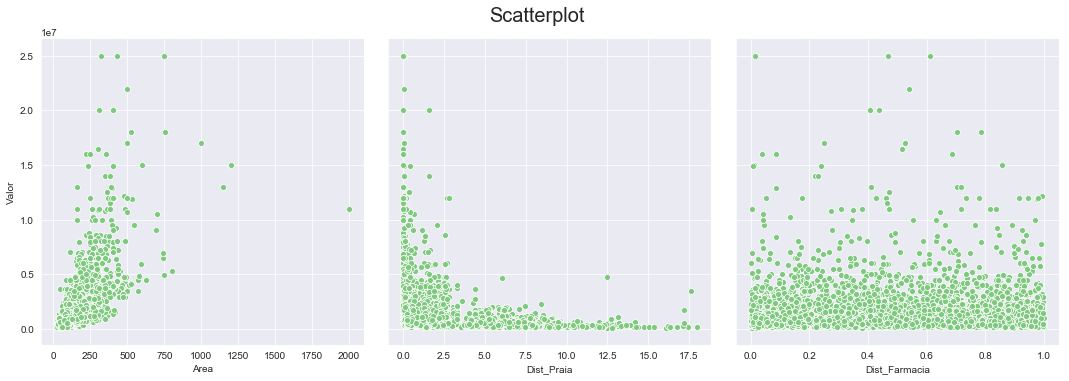

In [11]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height = 5)
ax.fig.suptitle('Scatterplot', fontsize = 20, y = 1.05)
plt.show()

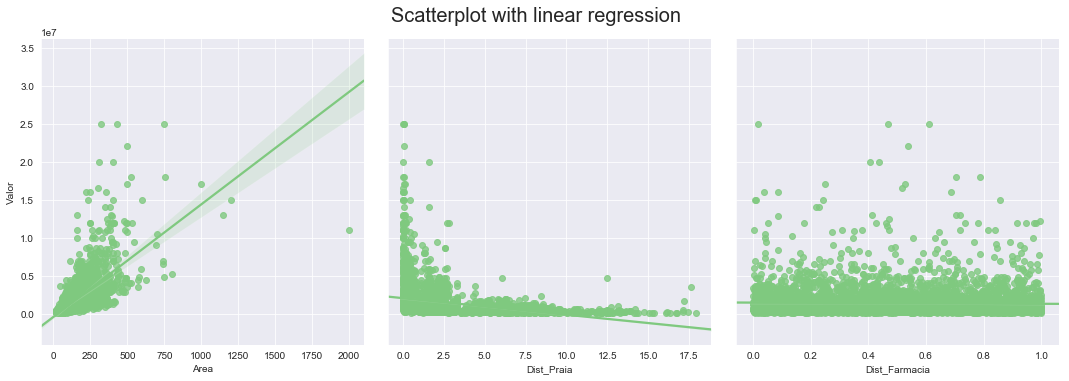

In [12]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Scatterplot with linear regression', fontsize = 20, y = 1.05)
plt.show()

## Import numpy library

https://numpy.org/

In [13]:
import numpy as np

## Applying logarithmic transformation to data from the *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [14]:
np.log(1)

0.0

In [15]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

In [16]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


## Frequency distribution of the transformed dependent variable * (y)

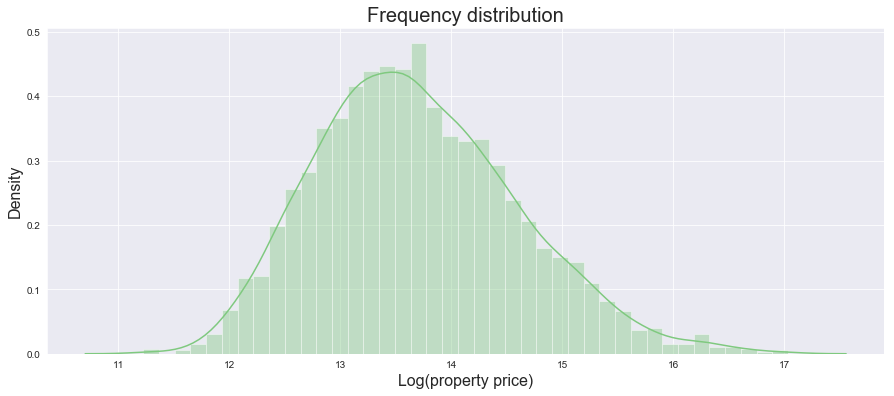

In [17]:
plt.figure(figsize = (15,6))
sns.distplot(dados['log_Valor'])
plt.title('Frequency distribution', fontsize=20)
plt.xlabel('Log(property price)', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.show()

## Scatterplot between transformed variables

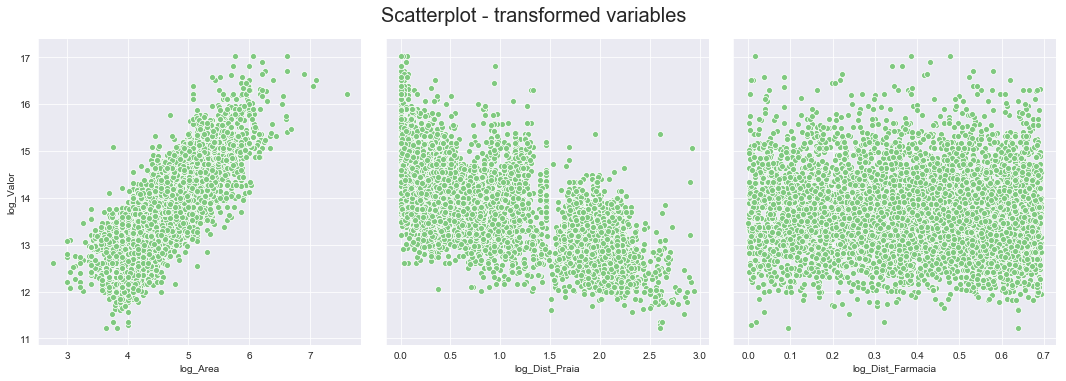

In [18]:
ax = sns.pairplot(dados, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], height = 5)
ax.fig.suptitle('Scatterplot - transformed variables', fontsize = 20, y = 1.05)
plt.show()

## Import *train_test_split* from *scikit-learn* library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:
from sklearn.model_selection import train_test_split

## Creating a series (pandas) to store property price (y)

In [20]:
y = dados['log_Valor']

## Creating a Dataframe (pandas) to store explanatory variables (X)

In [21]:
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

## Creating the train and test datasets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

## Import statsmodels library

https://www.statsmodels.org/stable/index.html

In [23]:
import statsmodels.api as sm

## Estimating model with statsmodels

In [24]:
X_train_com_constante = sm.add_constant(X_train)

C:\Users\HENRIQUE\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
X_train_com_constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
4561,1.0,5.438079,1.182793,0.628547
4229,1.0,4.127134,1.632077,0.176840
718,1.0,4.219508,1.838462,0.174500
3895,1.0,4.158883,0.536594,0.346678
4726,1.0,4.330733,2.164887,0.348602


In [26]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Evaluating model test statistics

In [27]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:21:50   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

## Creating a new set of explanatory variables (X)

In [28]:
X = dados[['log_Area', 'log_Dist_Praia']]

## Creating the train and test datasets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

## Estimating model with statsmodels

In [30]:
X_train_com_constante = sm.add_constant(X_train)

In [31]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Evaluating test statistics for new model

###  Combined parameters significance test
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Individual parameters significance test
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [32]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:21:51   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

## Import *LinearRegression* and *metrics* from *scikit-learn* library

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instantiating *LinearRegression ()* class

In [34]:
modelo = LinearRegression()

## Using the *fit()* method of the "model" object to estimate our linear model using  train data (y_train and X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [35]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Obtaining the determination coefficient (R²) of the estimated model with training data

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [36]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.805


## Generating predictions for test data (X_test) using the *predict()* method of the "model" object

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [37]:
y_previsto = modelo.predict(X_test)

## Obtaining the coefficient of determination (R²) for our model predictions

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [38]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.79


## Entrance data

In [39]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


## Generating pontual forecast

In [40]:
modelo.predict(entrada)[0]

14.284820061847878

## Reverse transformation to get the estimate in BLR (R$)

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [41]:
np.exp(modelo.predict(entrada)[0])

1598889.7847794362

## Creating a simple simulator

In [42]:
Area = 150
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

print('R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$ 1617664.12


## Getting the model intercept

In [43]:
modelo.intercept_

9.334916409800334

In [44]:
np.exp(modelo.intercept_)

11326.681428069902

## Getting the regression coefficients

In [45]:
modelo.coef_

array([ 1.05807818, -0.49061226])

## Confirming the order of explanatory variables in the Dataframe

In [46]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

## Creating a list of model variable names

In [47]:
index = ['Intercepto', 'log Área', 'log Distância até a Praia']

## Creating a Dataframe to save model coefficients

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [48]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parameters'])

,Parameters
Intercepto,9.334916
log Área,1.058078
log Distância até a Praia,-0.490612


## Interpretation of estimated coefficients

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercept</b> → Excluding the effect of explanatory variables ($X_2=X_3=0$) the average effect on property price would be <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Keeping the value of $X_3$ (distance to the beach) constant, an addition of 1% in the area of ​​a property generates, on average, an increase of <b>1.06%</b> in the price of the property.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Keeping the value of $X_2$ (area) constant, an addition of 1% in the distance from a property to the beach generates, on average, a decrease of <b>0.49%</b> in the price of the property.
</p>

## Generating model predictions from train data

In [49]:
y_previsto_train = modelo.predict(X_train)

## Scatterplot between estimated value and actual value

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

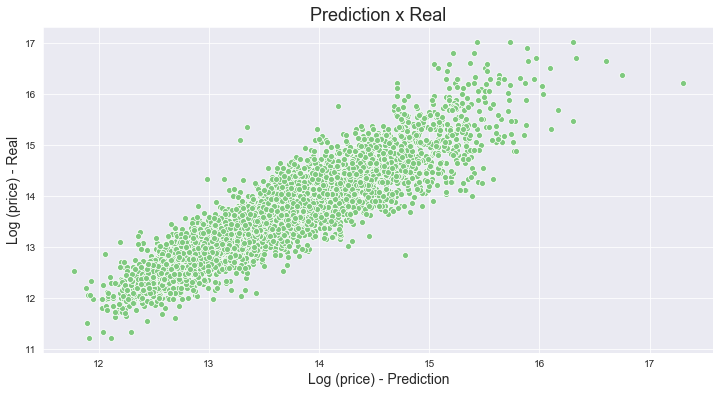

In [50]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Prediction x Real', fontsize=18)
ax.set_xlabel('Log (price) - Prediction', fontsize=14)
ax.set_ylabel('Log (price) - Real', fontsize=14)
plt.show()

## Getting the residual values

In [51]:
residuo = y_train - y_previsto_train

## Plotting the frequency distribution of residual values

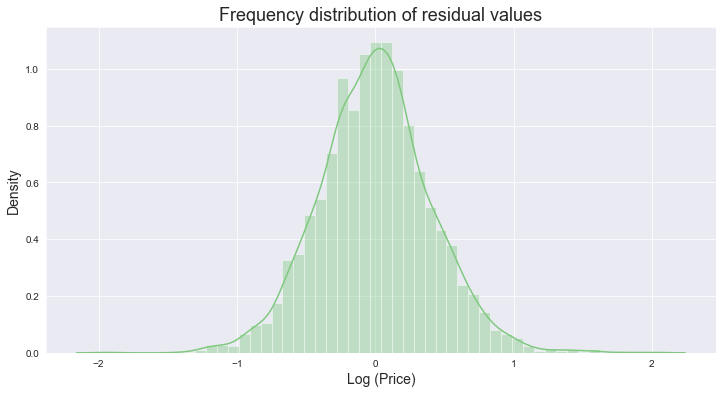

In [52]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution of residual values', fontsize=18)
ax.set_xlabel('Log (Price)', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
plt.show()